In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("dataset.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
#Q1 Check for missing values in each column
print("Missing values:\n", df.isnull().sum())


Missing values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [4]:
#Q1 For Numerical Columns: Replaced with mean/median or use domain-specific knowledge.
# For Categorical Columns: Replaced with mode or "unknown."
# Fill missing numerical data with the column's median
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical data with the mode
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("After filling missing values:\n", df.isnull().sum())


After filling missing values:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [5]:
#Q1 Function to identify outliers using IQR
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Detect and remove outliers
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}:\n", outliers)

# Optionally, remove outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


Outliers in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in bill_depth_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in flipper_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers in body_mass_g:
        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  


In [6]:
#Q1 Standardize categorical data
df['species'] = df['species'].str.lower()
df['island'] = df['island'].str.lower()
df['sex'] = df['sex'].str.lower().str.strip()

print(df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  adelie  torgersen            39.1           18.7              181.0   
1  adelie  torgersen            39.5           17.4              186.0   
2  adelie  torgersen            40.3           18.0              195.0   
3  adelie  torgersen            44.1           17.3              197.0   
4  adelie  torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3       4050.0    male  
4       3450.0  female  


In [7]:
#Q2
# Filter the dataset for Gentoo penguins
gentoo_penguins = df[df['species'].str.lower() == 'gentoo']

# Calculate the average body_mass_g for Gentoo penguins
average_body_mass_g = gentoo_penguins['body_mass_g'].mean()

print(f"The average body_mass_g for Gentoo penguins is: {average_body_mass_g:.2f} g")


The average body_mass_g for Gentoo penguins is: 5069.11 g


In [8]:
print(df['species'].unique())


['adelie' 'gentoo' 'chinstrap']


In [9]:
df['species'] = df['species'].str.strip().str.lower().fillna('unknown')



Feature: bill_length_mm
  adelie: Skewness = 0.11, Kurtosis = -0.30
  chinstrap: Skewness = -0.07, Kurtosis = -0.12
  gentoo: Skewness = 0.71, Kurtosis = 1.14

Feature: bill_depth_mm
  adelie: Skewness = 0.34, Kurtosis = -0.10
  chinstrap: Skewness = 0.02, Kurtosis = -0.93
  gentoo: Skewness = 0.33, Kurtosis = -0.60


C:\Users\SHREENIDHI\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


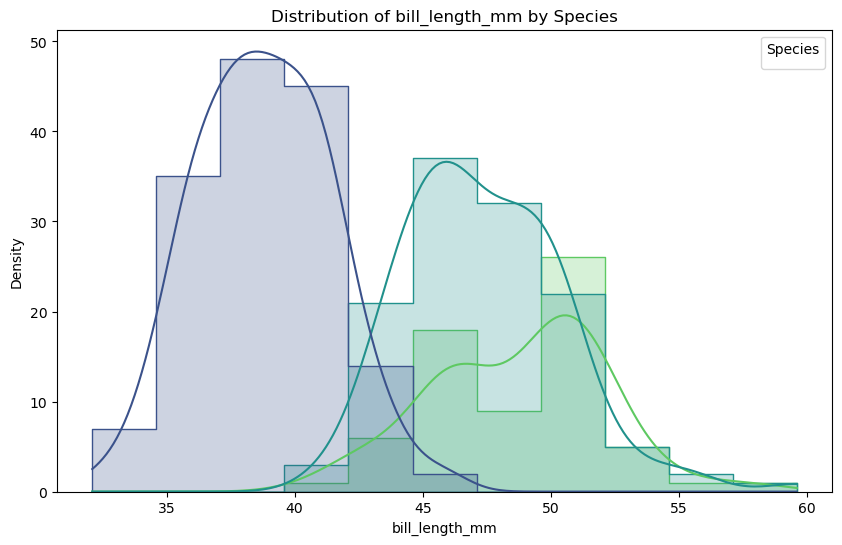

C:\Users\SHREENIDHI\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


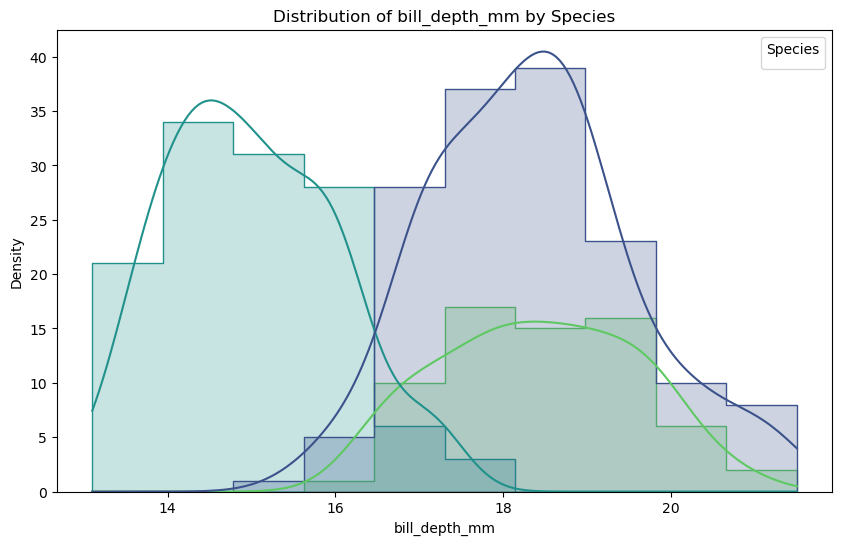

In [10]:
#Q3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Group dataset by species
grouped = df.groupby('species')

# Calculate skewness and kurtosis for bill_length_mm and bill_depth_mm
for feature in ['bill_length_mm', 'bill_depth_mm']:
    print(f"\nFeature: {feature}")
    for species, group in grouped:
        species_skew = skew(group[feature], nan_policy='omit')
        species_kurt = kurtosis(group[feature], nan_policy='omit')
        print(f"  {species}: Skewness = {species_skew:.2f}, Kurtosis = {species_kurt:.2f}")

# Visualize distributions with histograms and density plots
for feature in ['bill_length_mm', 'bill_depth_mm']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='species', kde=True, palette='viridis', element='step')
    plt.title(f"Distribution of {feature} by Species")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title='Species')
    plt.show()


In [11]:
# bill_length_mm:

# Adelie: Near-zero skewness (0.11) suggests a roughly symmetric distribution. Negative kurtosis (-0.30) indicates a distribution with slightly lighter tails than a normal distribution.
# Chinstrap: Near-zero skewness (-0.07) suggests a symmetric distribution. Slightly negative kurtosis (-0.12) suggests light tails.
# Gentoo: Positive skewness (0.71) indicates a longer right tail. Positive kurtosis (1.14) suggests heavier tails.
# bill_depth_mm:

# Adelie: Positive skewness (0.34) indicates a slight right tail. Kurtosis (-0.10) suggests a normal-like distribution with light tails.
# Chinstrap: Near-zero skewness (0.02) indicates symmetry. Negative kurtosis (-0.93) suggests very light tails.
# Gentoo: Positive skewness (0.33) suggests a slight right tail. Negative kurtosis (-0.60) suggests light tails.

Feature: bill_length_mm
Number of outliers: 0

Feature: bill_depth_mm
Number of outliers: 0

Feature: flipper_length_mm
Number of outliers: 0

Feature: body_mass_g
Number of outliers: 0



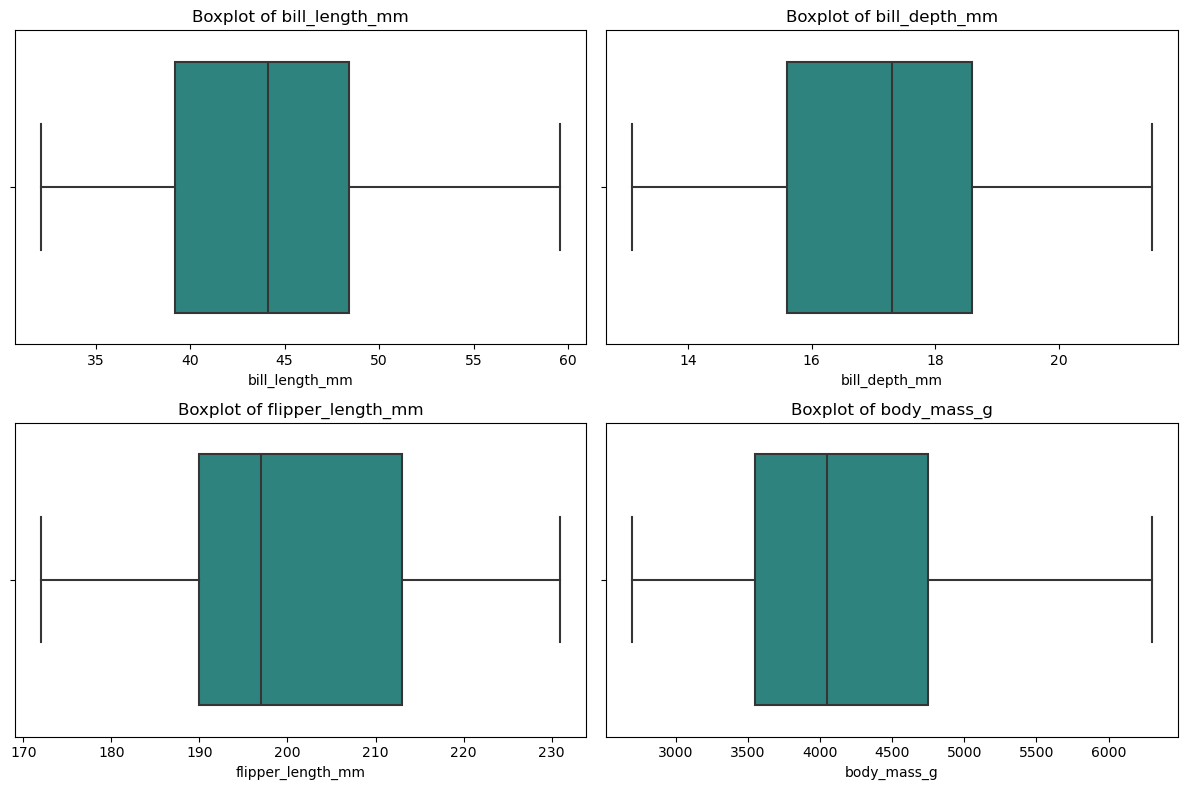

In [12]:
#Q4
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to check for outliers
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Function to detect outliers using IQR
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Identify and count outliers for each feature
for feature in numerical_features:
    outliers = detect_outliers(df, feature)
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[feature]])
    print()

# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, palette='viridis')
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [13]:

# To identify features with outliers, we will use the Interquartile Range (IQR) method. This method is widely used for detecting outliers because it focuses on the spread of the central 50% of the data, making it robust to skewed distributions.

# Steps to Detect and Visualize Outliers:
# Calculate IQR:

# IQR = Q3 - Q1
# Lower Bound = Q1 - 1.5 × IQR
# Upper Bound = Q3 + 1.5 × IQR
# Data points outside this range are considered outliers.
# Identify Outliers:

# For each numerical feature, check which values fall outside the bounds.
# Visualize Outliers:

# Use boxplots to visualize outliers for each feature.
# Code
# python
# Copy code
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of numerical features to check for outliers
# numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# # Function to detect outliers using IQR
# def detect_outliers(data, feature):
#     Q1 = data[feature].quantile(0.25)
#     Q3 = data[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
#     return outliers

# # Identify and count outliers for each feature
# for feature in numerical_features:
#     outliers = detect_outliers(df, feature)
#     print(f"Feature: {feature}")
#     print(f"Number of outliers: {len(outliers)}")
#     if not outliers.empty:
#         print(outliers[[feature]])
#     print()

# # Visualize outliers using boxplots
# plt.figure(figsize=(12, 8))
# for i, feature in enumerate(numerical_features, 1):
#     plt.subplot(2, 2, i)
#     sns.boxplot(data=df, x=feature, palette='viridis')
#     plt.title(f"Boxplot of {feature}")
#     plt.xlabel(feature)

# plt.tight_layout()
# plt.show()
# Explanation
# Outlier Detection (IQR Method):

# The IQR method detects outliers as points outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
# This technique is resistant to the influence of extreme data points, making it reliable for most datasets.
# Visualization:

# Boxplots: A compact way to represent distributions and highlight outliers. Outliers appear as individual points outside the "whiskers" of the boxplot.
# Output:

# For each feature, the script prints:
# The number of outliers.
# The actual outlier values.
# Boxplots visually show the distributions and highlight outliers for each feature.

In [14]:
#Q5 For this dataset:

# The number of features is relatively low (7 columns: 4 numerical, 3 categorical).
# The curse of dimensionality typically becomes significant when there are many numerical features (e.g., hundreds or thousands).
# PCA (Principal Component Analysis) can still be performed to reduce dimensionality and explore feature interdependencies.


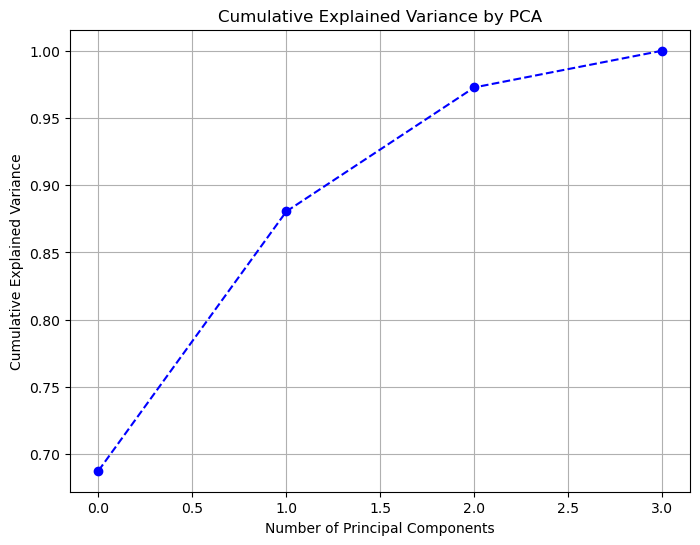

Number of components to retain 95% variance: 3
        PC1       PC2       PC3
0 -1.841929  0.057238 -0.225657
1 -1.304042 -0.421590 -0.024062
2 -1.366092 -0.146346  0.203776
3 -0.273289  0.071330  0.176797
4 -1.878379  0.009833 -0.616181


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
numerical_data = df[numerical_features]

# Standardize numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components to retain (e.g., 95% variance threshold)
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# Transform data to reduced dimensions
pca_reduced = PCA(n_components=n_components)
reduced_data = pca_reduced.fit_transform(scaled_data)

# Convert reduced data to a DataFrame for inspection
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(n_components)])
print(reduced_df.head())


In [16]:
# Standardization:

# Numerical features are standardized to ensure equal contribution during PCA.
# PCA is sensitive to scale, so standardization is essential.
# PCA Transformation:

# PCA converts features into orthogonal principal components that capture the maximum variance.
# Each component is a linear combination of the original features.
# Explained Variance:

# explained_variance_ratio_ indicates how much variance each component explains.
# A cumulative plot helps decide how many components to retain (e.g., components explaining 95% of variance).
# Dimensionality Reduction:

# The dataset is transformed to the reduced number of principal components while retaining most information.
# Usefulness in This Dataset
# Even though this dataset has few dimensions, PCA can:

# Identify redundancies in numerical features.
# Simplify the dataset for downstream tasks.
# Visualize the dataset in lower-dimensional space (e.g., 2D or 3D scatter plots).

C:\Users\SHREENIDHI\AppData\Local\Temp\ipykernel_36932\1317839879.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=filtered_df, x='bill_length_mm', y='bill_depth_mm', cmap="Blues", shade=True, ax=axes[1, 0])
C:\Users\SHREENIDHI\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREENIDHI\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREENIDHI\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depreca

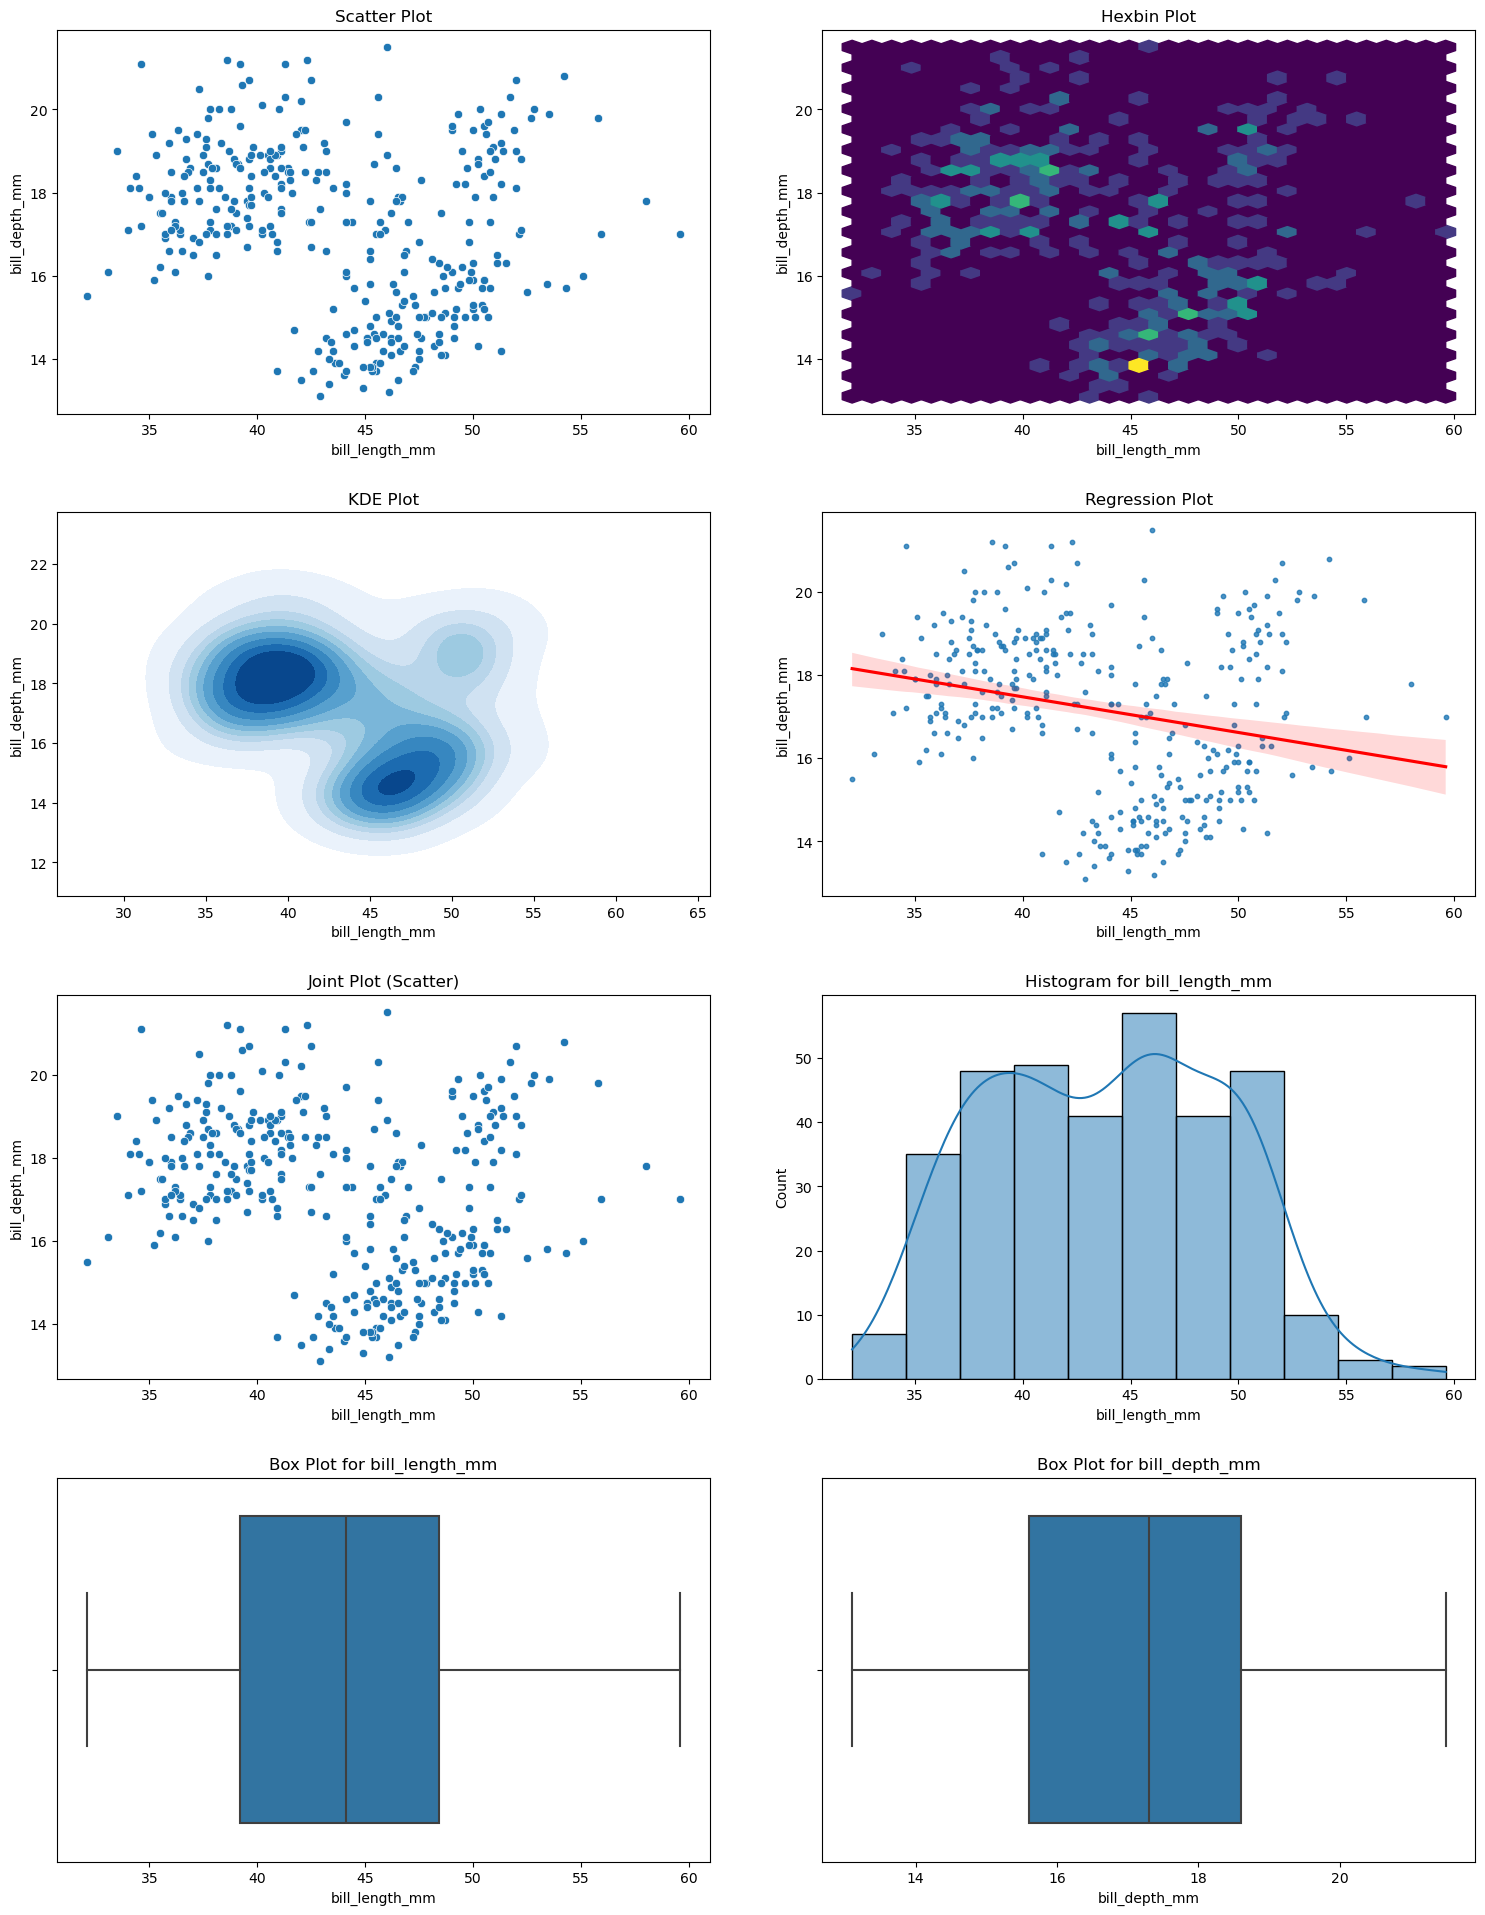

In [17]:
#Q6
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to remove missing values for the selected features
filtered_df = df[['bill_length_mm', 'bill_depth_mm']].dropna()

# Set up the figure for subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.tight_layout(pad=5.0)

# Scatter Plot
sns.scatterplot(data=filtered_df, x='bill_length_mm', y='bill_depth_mm', ax=axes[0, 0])
axes[0, 0].set_title("Scatter Plot")

# Hexbin Plot
axes[0, 1].hexbin(filtered_df['bill_length_mm'], filtered_df['bill_depth_mm'], gridsize=30, cmap='viridis')
axes[0, 1].set_title("Hexbin Plot")
axes[0, 1].set_xlabel("bill_length_mm")
axes[0, 1].set_ylabel("bill_depth_mm")

# KDE Plot
sns.kdeplot(data=filtered_df, x='bill_length_mm', y='bill_depth_mm', cmap="Blues", shade=True, ax=axes[1, 0])
axes[1, 0].set_title("KDE Plot")

# Regression Plot
sns.regplot(data=filtered_df, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axes[1, 1])
axes[1, 1].set_title("Regression Plot")

# Joint Plot (scatter with histograms)
sns.scatterplot(data=filtered_df, x='bill_length_mm', y='bill_depth_mm', ax=axes[2, 0])
axes[2, 0].set_title("Joint Plot (Scatter)")

# Marginal Histogram for `bill_length_mm`
sns.histplot(data=filtered_df['bill_length_mm'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title("Histogram for bill_length_mm")

# Box Plot for `bill_length_mm`
sns.boxplot(data=filtered_df, x='bill_length_mm', ax=axes[3, 0])
axes[3, 0].set_title("Box Plot for bill_length_mm")

# Box Plot for `bill_depth_mm`
sns.boxplot(data=filtered_df, x='bill_depth_mm', ax=axes[3, 1])
axes[3, 1].set_title("Box Plot for bill_depth_mm")

plt.show()


In [18]:
# Scatter Plot:

# Displays individual data points showing the relationship between bill_length_mm and bill_depth_mm.
# Hexbin Plot:

# A density-based plot where the color intensity reflects the concentration of data points.
# KDE Plot:

# A smooth density estimation in two dimensions.
# Regression Plot:

# A scatter plot with a fitted regression line to analyze the trend.
# Joint Plot (Scatter):

# Combines scatter with marginal histograms to show the distribution.
# Histogram for bill_length_mm:

# Univariate distribution plot of bill_length_mm.
# Box Plots:

# Displays the spread and potential outliers for bill_length_mm and bill_depth_mm

In [19]:
#Q7 Group by species and island, then find the maximum flipper_length_mm
max_flipper_length = (
    df.groupby(['species', 'island'])['flipper_length_mm']
    .max()
    .reset_index()
    .sort_values(['island', 'flipper_length_mm'], ascending=[True, False])
)

# Display the result
print("Maximum flipper length for each species and island:")
print(max_flipper_length)

# Find the species with the longest flippers on each island
longest_flippers_by_island = (
    max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]
)

print("\nSpecies with the longest flippers on each island:")
print(longest_flippers_by_island)


Maximum flipper length for each species and island:
     species     island  flipper_length_mm
4     gentoo     biscoe              231.0
0     adelie     biscoe              203.0
3  chinstrap      dream              212.0
1     adelie      dream              208.0
2     adelie  torgersen              210.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     gentoo     biscoe              231.0
3  chinstrap      dream              212.0
2     adelie  torgersen              210.0


In [20]:
#Q8
from scipy.stats import zscore

# Select numerical columns for normalization
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Perform z-score normalization
df_normalized = df.copy()  # Create a copy to keep the original data intact
df_normalized[numerical_columns] = df[numerical_columns].apply(zscore)

# Display the normalized dataset
print("Z-score normalized dataset (first 5 rows):")
print(df_normalized.head())

# Verify the mean and standard deviation after normalization
for column in numerical_columns:
    print(f"\nFeature: {column}")
    print(f"Mean: {df_normalized[column].mean():.2f}, Std Dev: {df_normalized[column].std():.2f}")


Z-score normalized dataset (first 5 rows):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  adelie  torgersen       -0.875641       0.788528          -1.419612   
1  adelie  torgersen       -0.801837       0.126994          -1.062878   
2  adelie  torgersen       -0.654229       0.432317          -0.420757   
3  adelie  torgersen        0.046912       0.076107          -0.278064   
4  adelie  torgersen       -1.318467       1.093851          -0.563451   

   body_mass_g     sex  
0    -0.565065    male  
1    -0.502525  female  
2    -1.190470  female  
3    -0.189822    male  
4    -0.940308  female  

Feature: bill_length_mm
Mean: -0.00, Std Dev: 1.00

Feature: bill_depth_mm
Mean: 0.00, Std Dev: 1.00

Feature: flipper_length_mm
Mean: -0.00, Std Dev: 1.00

Feature: body_mass_g
Mean: -0.00, Std Dev: 1.00
